# TAREA 2 | PUNTO 6 (ORBITA MERCURIO)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
G = 6.67430e-11  # m^3 kg^-1 s^-2
M_sol = 1.989e30  # kg
alpha = 1.1e-8  # au^2
a = 0.387098  # au
ex = 0.205630  # Excentricidad de la órbita de Mercurio
ht = 1000000  # Paso temporal
T = 88 * 24 * 3600  # Periodo orbital de Mercurio, s
orbits = 10 # Número de órbitas a simular

m = 1.496e11  # De au a m

p0 = a * (1 + ex)
ve = np.sqrt(G * M_sol / (a * (1 - ex) * m))

r0 = np.array([p0, 0]) * m  # Posición inicial en el afelio
v0 = np.array([0, ve])  # Velocidad inicial

In [3]:
def verlet_mod(r, v, ht, steps):
    positions = [r]
    for _ in range(steps):
        r_norm = np.linalg.norm(r)
        na = -G * M_sol * r
        da = r_norm**3 * (1 + alpha / r_norm**2)
        a = na / da  # a con corrección relativista
        rp = v * ht + 0.5 * a * ht**2
        r_new = r + rp
        r_new_norm = np.linalg.norm(r_new)
        na_new = -G * M_sol * r_new
        da_new = r_new_norm**3 * (1 + alpha / r_new_norm**2)
        a_new = na_new / da_new
        vp = 0.5 * (a + a_new) * ht
        v = v + vp
        r = r_new
        positions.append(r)
    return np.array(positions)

<IPython.core.display.Javascript object>


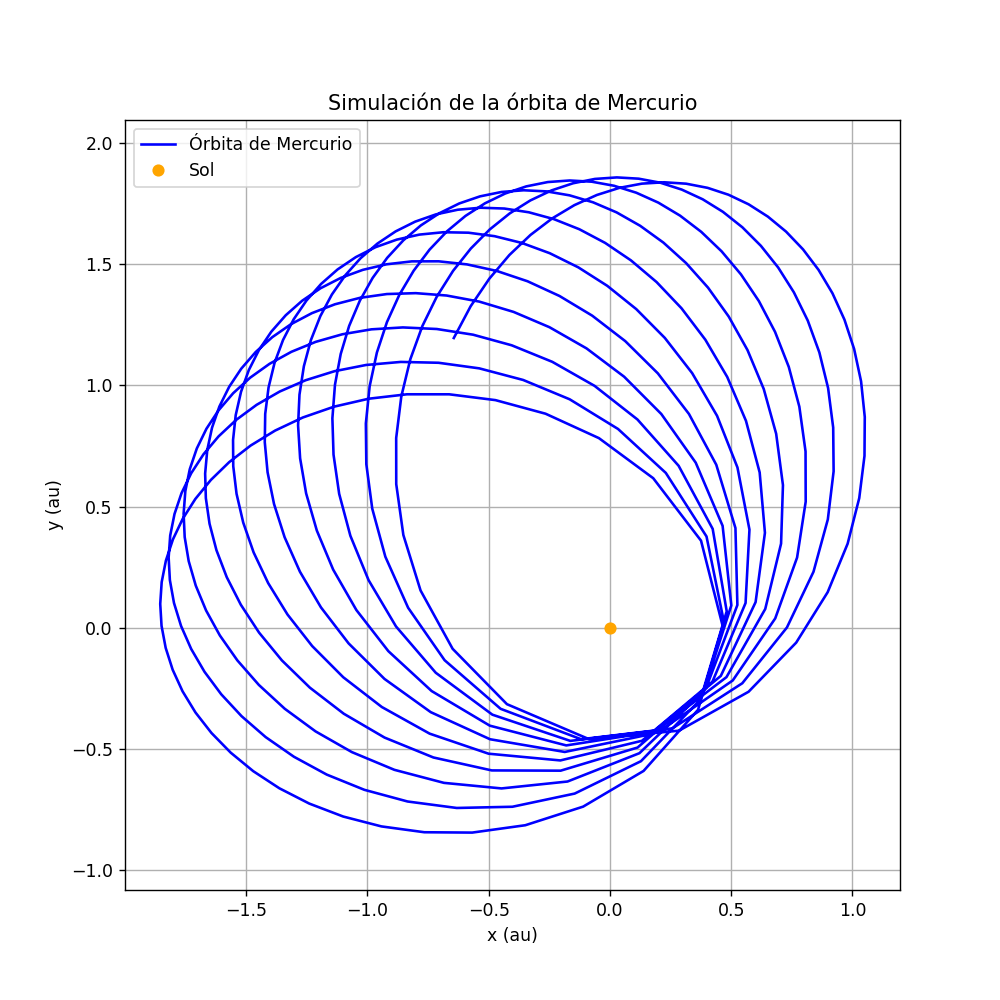

In [4]:
num_orbits = 5.5 * orbits
steps = int(T * num_orbits / ht)
positions = verlet_mod(r0, v0, ht, steps)

plt.figure(figsize=(8, 8))
plt.plot(positions[:, 0] / m, positions[:, 1] / m, label="Órbita de Mercurio", color = 'blue')
plt.plot(0, 0, 'o', label="Sol", color = 'orange')
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.title("Simulación de la órbita de Mercurio")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


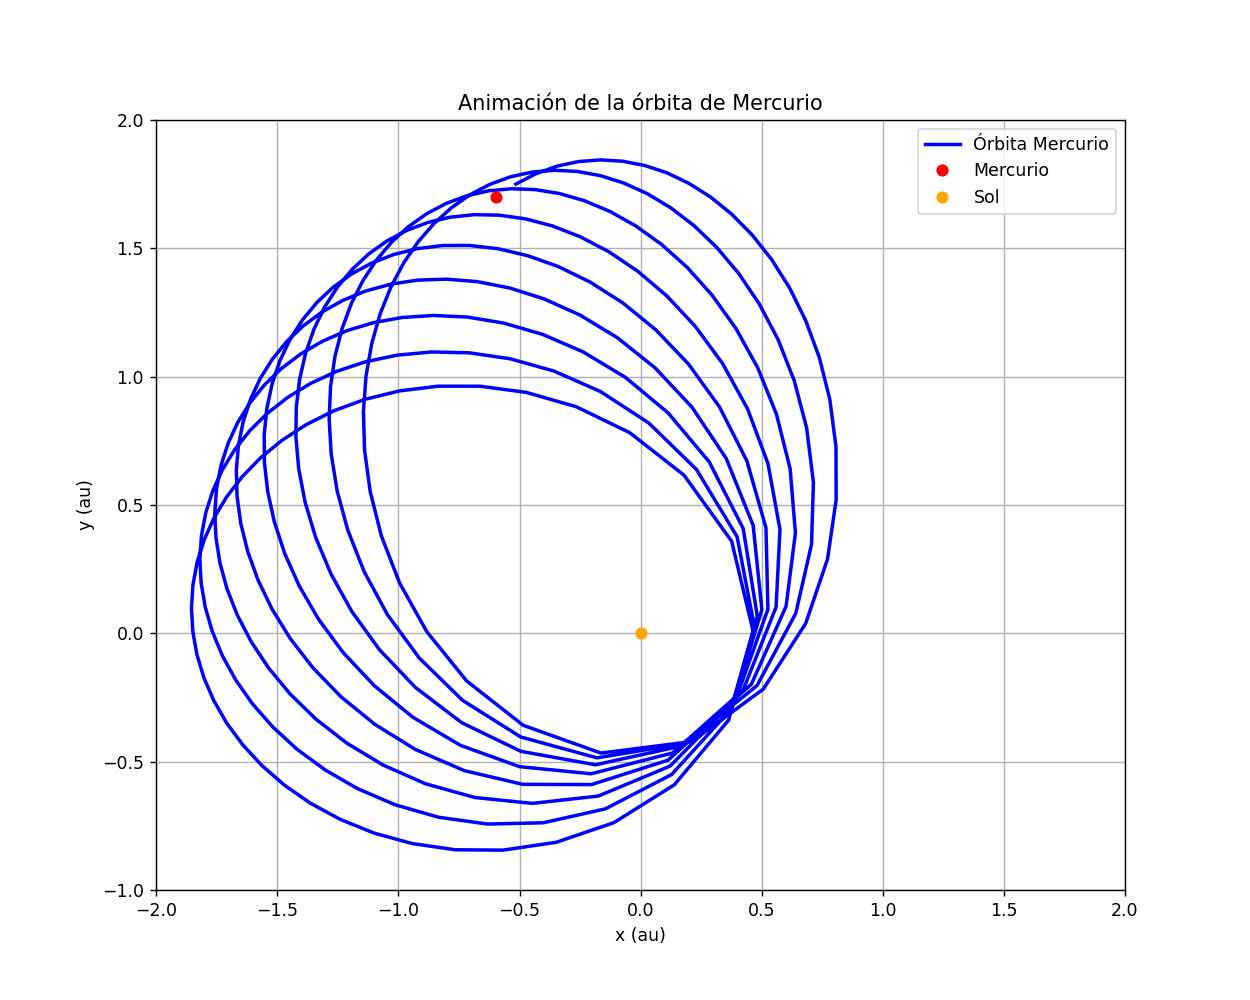

In [5]:
# Preparación de la animación
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim((-2.0, 2.0))
ax.set_ylim((-1., 2.0))
line, = ax.plot([], [], lw=2, label='Órbita Mercurio', color = 'blue')
point, = ax.plot([], [], 'ro', label='Mercurio')
ax.plot(0, 0, 'o', label="Sol", color = 'orange')  # Posición del Sol

# Inicialización de la animación
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Función de animación que se llama en cada cuadro
def animate(i):
    
    line.set_data(positions[:i, 0] / m, positions[:i, 1] / m)
    point.set_data(positions[i, 0] / m, positions[i, 1] / m)
    return line, point

# Creación y ejecución de la animación
anim = FuncAnimation(fig, animate, init_func=init, frames=len(positions), interval=10, blit=True)

plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.title("Animación de la órbita de Mercurio")
plt.legend()
plt.grid(True)
plt.show()